CSV файл Smartphone_Usage_Productivity_Dataset_50000.csv успешно загружен. Форма: (50000, 13)
Возраст
       Age
0       55
1       45
2       32
3       46
4       55
...    ...
10019   36
10020   42
10021   24
10022   38
10023   27

[10024 rows x 1 columns]
Кофе
      Caffeine_Intake_Cups
0                        0
1                        1
2                        1
3                        0
4                        1
...                    ...
9536                     6
9537                     6
9538                     4
9539                     4
9540                     3

[9541 rows x 1 columns]
Средний возраст респондентов
     Daily_Phone_Hours   AVG(Age)
0                  1.0  38.577465
1                  1.1  39.031250
2                  1.2  39.026570
3                  1.3  38.705376
4                  1.4  39.445161
..                 ...        ...
106               11.6  38.851508
107               11.7  38.537190
108               11.8  38.443231
109              

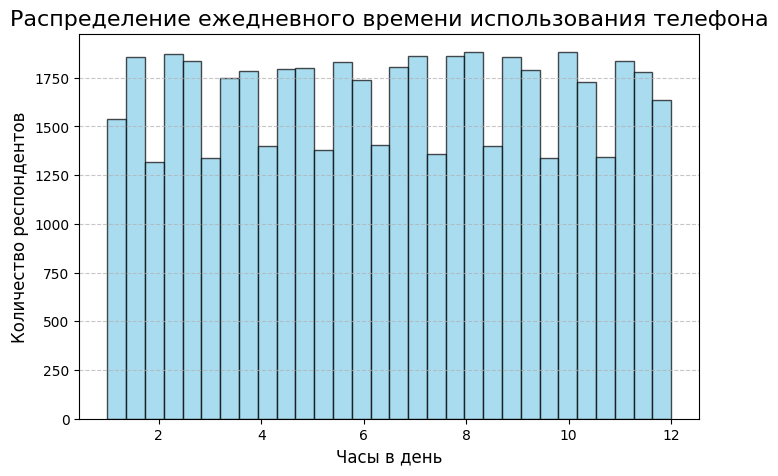

/tmp/ipython-input-4130425692.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Stress_Level', data=data, palette='Set2')


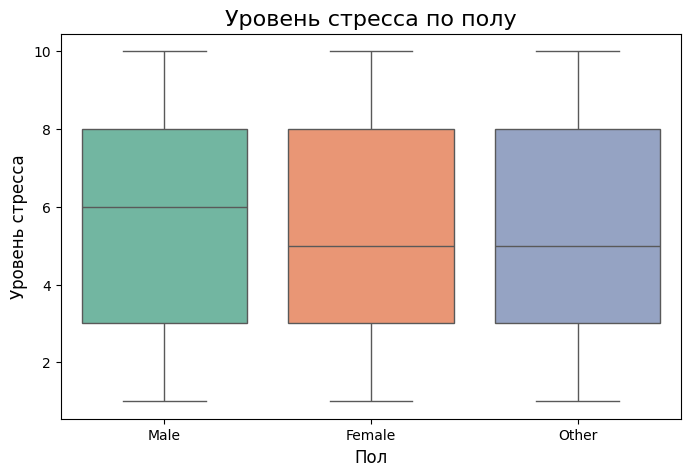

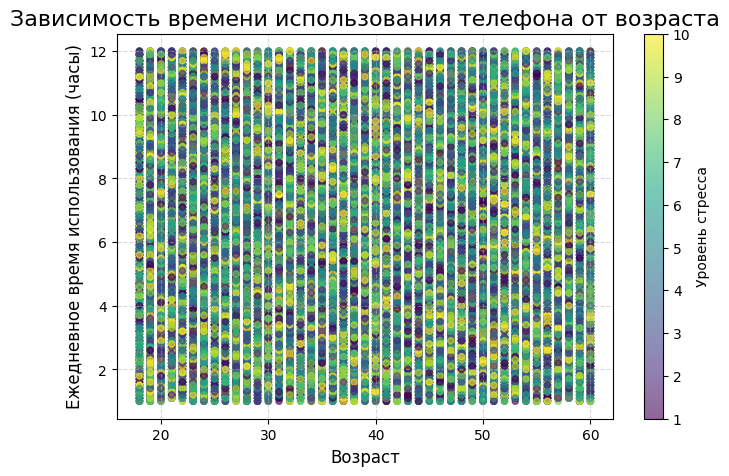

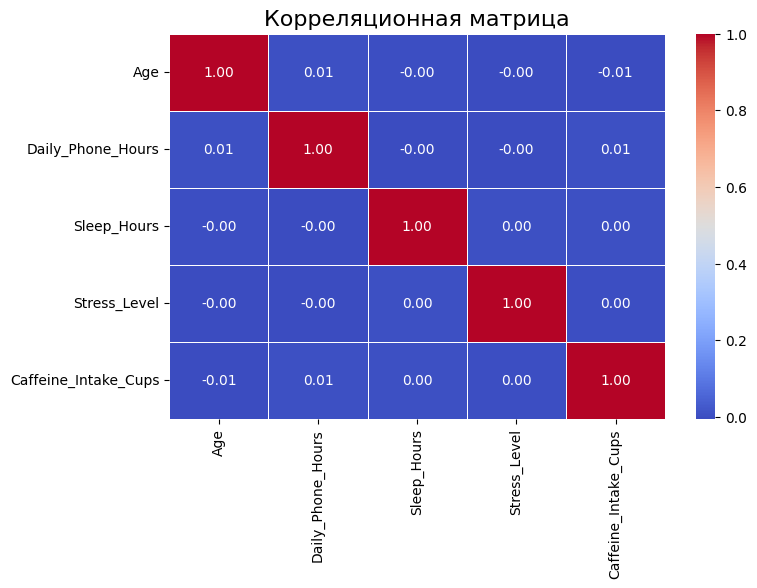

In [10]:
import pandas as pd
import sqlite3
import data_loader as dl
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
file_path = 'Smartphone_Usage_Productivity_Dataset_50000.csv'  # Замените на путь к вашему CSV файлу
data = dl.load_csv(file_path)

# Создаем подключение к SQLite базе данных
conn = sqlite3.connect('Smartphone_Usage.db')
cursor = conn.cursor()

# Создание таблицы
cursor.execute('''
  CREATE TABLE IF NOT EXISTS Smartphone_Usage (user_id INTEGER PRIMARY KEY,
    Age INTEGER,
    Gender TEXT,
    Occupation TEXT,
    Daily_Phone_Hours INTEGER,
    Sleep_Hours INTEGER,
    Stress_Level INTEGER,
    Caffeine_Intake_Cups INTEGER
  )
''')
conn.commit()

# Импорт данных
data [['Age', 'Gender','Occupation', 'Daily_Phone_Hours', 'Sleep_Hours', 'Stress_Level', 'Caffeine_Intake_Cups']].to_sql('Smartphone_Usage', conn, if_exists='replace', index=False)
conn.commit()

# Определяем функцию для выполнения запросов
def execute_query(query):
    cursor.execute(query)
    return cursor.fetchall()

# Определяем возраст респондентов, у которых уровень стресса больше 8
print("Возраст")
print(pd.read_sql("SELECT Age FROM Smartphone_Usage WHERE Stress_Level > 8", conn))

# Выведем количество чашек кофе, потребляемых респондентами, у которых продолжительность сна меньше 5 часов
print("Кофе")
print(pd.read_sql("SELECT Caffeine_Intake_Cups FROM Smartphone_Usage WHERE Sleep_Hours <5", conn))

# Найдем средний возраст респондентов по среднему времени использования телефона в день
print("Средний возраст респондентов")
print(pd.read_sql("SELECT Daily_Phone_Hours, AVG(Age) FROM Smartphone_Usage GROUP BY Daily_Phone_Hours", conn))

# Посчитаем количество женщин среди респондентов
print("Женщины")
print(pd.read_sql("SELECT COUNT(*) FROM Smartphone_Usage WHERE Gender='Female'", conn))

# Суммируем количество выпитых чашек кофе
print("Кофе")
print(pd.read_sql("SELECT SUM(Caffeine_Intake_Cups) FROM Smartphone_Usage", conn))

# Визуализация распределения Daily_Phone_Hours
plt.figure(figsize=(8, 5))
plt.hist(data['Daily_Phone_Hours'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение ежедневного времени использования телефона', fontsize=16)
plt.xlabel('Часы в день', fontsize=12)
plt.ylabel('Количество респондентов', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Визуализация зависисмости стресса от пола
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Stress_Level', data=data, palette='Set2')
plt.title('Уровень стресса по полу', fontsize=16)
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Уровень стресса', fontsize=12)
plt.show()

# Точечный график зависсимости времени использования телефона от возраста, окрашенный по уровню стресса
plt.figure(figsize=(8, 5))
scatter = plt.scatter(data['Age'], data['Daily_Phone_Hours'],
                      c=data['Stress_Level'], cmap='viridis', alpha=0.6, s=20)
plt.colorbar(scatter, label='Уровень стресса')
plt.title('Зависимость времени использования телефона от возраста', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Ежедневное время использования (часы)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Тепловая карта корреляций между числовыми переменными
# Выберем числовые столбцы
numeric_cols = ['Age', 'Daily_Phone_Hours', 'Sleep_Hours', 'Stress_Level', 'Caffeine_Intake_Cups']
corr = data[numeric_cols].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица', fontsize=16)
plt.show()

conn.close()